<a href="https://colab.research.google.com/github/enetlopes/ML--task1/blob/main/task_1_Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARK FOUNDATION-**
**DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP** 
**(#GRIPAPRIL2022)** 

**Submitted By - Enet Dominic Lopes**

**TASK1- Prediction Using Supervised Machine Learning**

**In this task we have to predict the percentage score of student based on the number of hours studied.It is a simple linear regression task as it involves two variables.**


**Importing libraries**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Reading Data From Given URL**

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("data imported successfully")

data imported successfully


**Exploring data**

In [3]:
print(data.shape)

(25, 2)


In [4]:
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Plotting the Data**

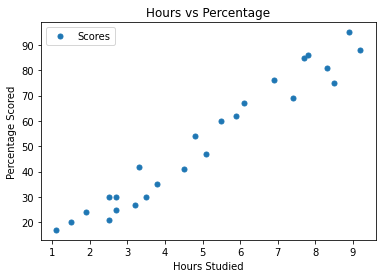

In [8]:
#plotting the scores
data.plot(x='Hours', y='Scores', style='.', markersize='10')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs Percentage')
plt.show()

**We can clearly observe the relation between hours studied and percentage scored.**

**Divide the data into attributes and labels**

In [9]:
X=data.iloc[:,:1].values
y=data.iloc[:,1:].values

In [10]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [12]:
#Splitting the data into Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training the model**

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Training complete!!")

Training complete!!


**Plotting the Regression line**

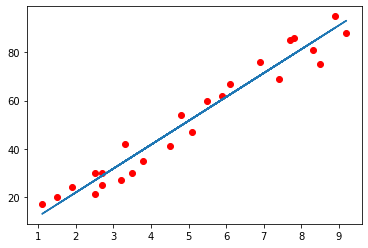

In [14]:
line = lin_reg .coef_*X+lin_reg .intercept_
plt.scatter(X, y, color = "Red")
plt.plot(X, line);
plt.show()

**Predictions**

In [17]:
print(X_test)
y_pred = lin_reg .predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Actual vs Predicted**

In [24]:
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


**What will be the predicted score if a student studies for 9.25 hrs/day?**

In [26]:
hours = np.array([[9.25]])
prediction = lin_reg.predict(hours)
print('No of hours/day ={}'. format(hours))
print('Predicted score={}'.format(prediction[0]))

No of hours/day =[[9.25]]
Predicted score=[93.69173249]


**We are going to evaluate our trained model by calculating mean absolute error**

In [27]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
